In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Library as lb
import tensorflow as tf
from tensorflow import keras

Training the model

In [2]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.01,    
  decay_steps=25,
  decay_rate=8,
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, min_delta=0.0001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=1000, batch_size=32):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[
                  tf.keras.losses.MeanSquaredError("auto", "mean_squared_error"),
                  'accuracy'])

    model.summary()

    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)

    val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    val_dataset = val_dataset.batch(batch_size)

    history = model.fit(
            train_dataset,
            epochs=max_epochs,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            batch_size = batch_size,
            verbose=2)

    return history

# Loading training dataset
folder = 'Darcy'
input_train=np.load('../data/' + folder + '/input_train.npy')
input_test=np.load('../data/' + folder + '/input_test.npy')
output_train=np.load('../data/' + folder + '/output_train.npy')
output_test=np.load('../data/' + folder + '/output_test.npy')

INPUTDIM = (input_train.shape[1],input_train.shape[2])
OUTPUTDIM = (output_train.shape[1],output_train.shape[2])


# # Define multi-gpu strategy 
# mirrored_strategy = tf.distribute.MirroredStrategy()

# # Create strategy scope to perform training
# with mirrored_strategy.scope():
    # Creting model
model = lb.FNO2D(INPUTDIM, OUTPUTDIM, p_dim=32, n=11, k_max=7, verbose=True, model_name='Darcy_FNO', dropout=0.05, kernel_reg=0.005)
history = compile_and_fit(model, model.name, x_train=input_train, y_train=output_train, x_test=input_test, y_test=output_test, optimizer=None, max_epochs=2000)




Creating Fourier Layer 0
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 1
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 2
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 3
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 4
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 5
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 6
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 7
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 8
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 9
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
Creating Fourier Layer 10
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
-----------------------------------------------------

KeyboardInterrupt: 

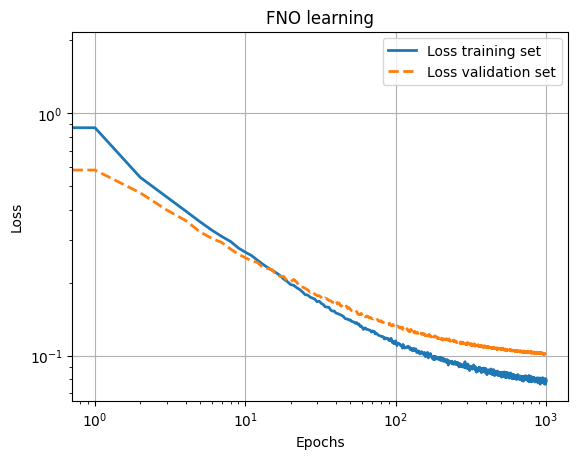

In [12]:
bc     = history.history['loss']
val_bc = history.history['val_loss']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('FNO learning')
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(('Loss training set','Loss validation set'))
plt.savefig('../Darcy_FNO.png', dpi=300)
plt.show()

7/7 [==============================] - 1s 66ms/step


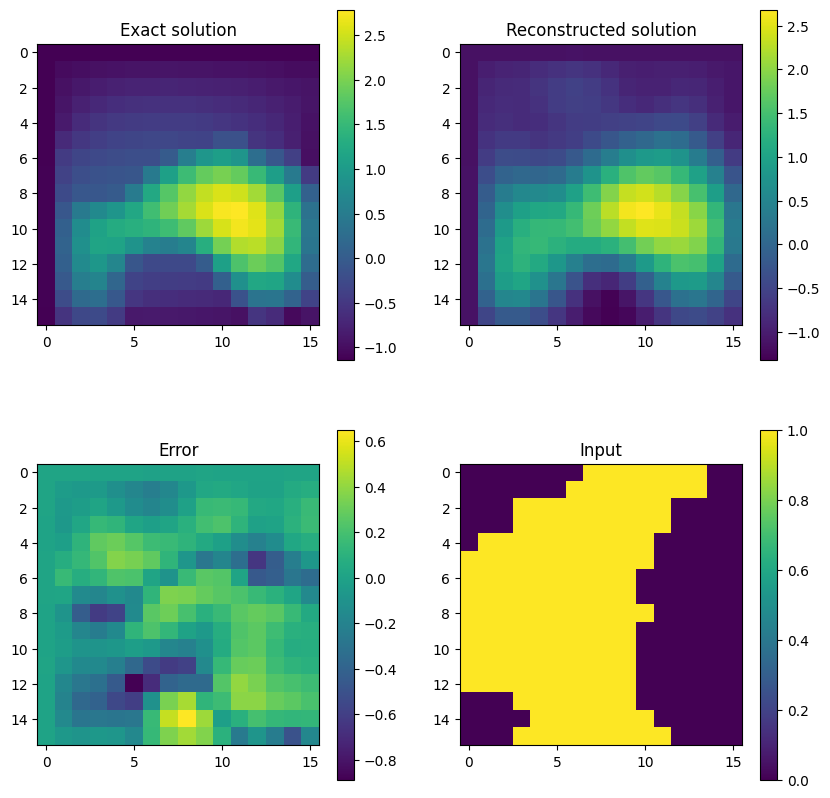

In [13]:
rec_output = model.predict(input_test)
index = 10

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
ax.set_title('Exact solution')
m = ax.imshow(output_test[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 2)
ax.set_title('Reconstructed solution')
m = ax.imshow(rec_output[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 3)
ax.set_title('Error')
m = ax.imshow(output_test[index]-rec_output[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 4)
ax.set_title('Input')
m = ax.imshow(input_train[index])
fig.colorbar(m, ax=ax, location='right')

In [8]:
save_NN = False
# save_NN = True
if save_NN:
    model.save('../data/'+folder+'/Darcy_FNO.h5')
    print('FNO saved in '+str(folder))

FNO saved in Darcy


In [ ]:
save_NN = False
# save_NN = True
if save_NN:
    model.save('../data/'+folder+'/Darcy_FNO.h5')
    print('FNO saved in '+str(folder))

FNO saved in Burgers


Loading the model

In [3]:
folder = 'Darcy'
loaded_model = keras.models.load_model('../data/'+folder+'/Darcy_FNO.h5', compile=False)

fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12
fft_shape set: 7
ifft_shape set: 12
Bias layer has shape: 12


In [4]:
input_test=np.load('../data/' + folder + '/input_test.npy')
output_test=np.load('../data/' + folder + '/output_test.npy')

7/7 [==============================] - 0s 67ms/step


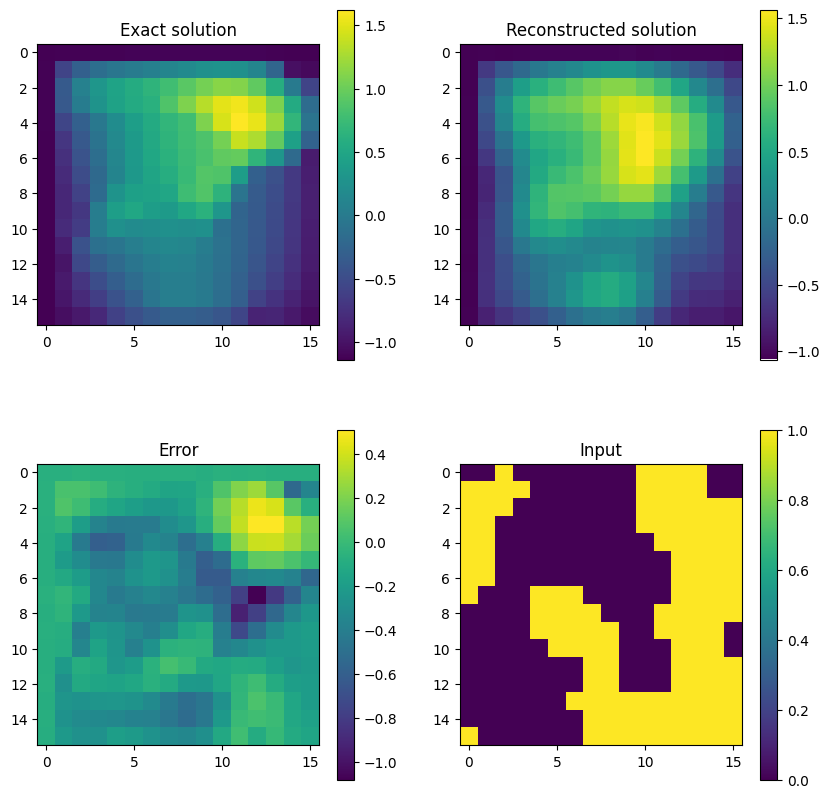

In [10]:
from random import randint
rec_output = loaded_model.predict(input_test)
index = randint(0, input_test.shape[0]-1)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 2, 1)
ax.set_title('Exact solution')
m = ax.imshow(output_test[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 2)
ax.set_title('Reconstructed solution')
m = ax.imshow(rec_output[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 3)
ax.set_title('Error')
m = ax.imshow(output_test[index]-rec_output[index])
fig.colorbar(m, ax=ax, location='right')

ax = fig.add_subplot(2, 2, 4)
ax.set_title('Input')
m = ax.imshow(input_train[index])
fig.colorbar(m, ax=ax, location='right')

Train again

In [8]:
lr_schedule(1000).numpy()

3.1152646e-05

In [11]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  3e-5,    
  decay_steps=50,
  decay_rate=6,
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200, min_delta=0.0001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=1000, batch_size=32):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss=tf.keras.losses.MeanSquaredError(),
                metrics=[
                  tf.keras.losses.MeanSquaredError("auto", "mean_squared_error"),
                  'accuracy'])

    model.summary()

    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size)

    val_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    val_dataset = val_dataset.batch(batch_size)

    history = model.fit(
            train_dataset,
            epochs=max_epochs,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            batch_size = batch_size,
            verbose=2)

    return history

# Loading training dataset
folder = 'Darcy'
input_train=np.load('../data/' + folder + '/input_train.npy')
input_test=np.load('../data/' + folder + '/input_test.npy')
output_train=np.load('../data/' + folder + '/output_train.npy')
output_test=np.load('../data/' + folder + '/output_test.npy')

INPUTDIM = (input_train.shape[1],input_train.shape[2])
OUTPUTDIM = (output_train.shape[1],output_train.shape[2])


history = compile_and_fit(loaded_model, loaded_model.name, x_train=input_train, y_train=output_train, x_test=input_test, y_test=output_test, optimizer=None, max_epochs=500)




Model: "Darcy_FNO"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 16, 16)]          0         
                                                                 
 reshape_4 (Reshape)         (None, 256)               0         
                                                                 
 P_layer (Dense)             (None, 1024)              263168    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 reshape_5 (Reshape)         (None, 32, 32)            0         
                                                                 
 fourier_layer_0 (Fourier_La  (None, 32, 12)           433       
 yer_2D)                                                         
                                                         

KeyboardInterrupt: 